In [1]:
import sys
sys.path.insert(0, '../src')
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from yahtzee import YahtzeeGame

In [5]:
N = 100000

def simulate_games(n_games=10000, verbose=False):
    scores = []
    start = time.time()
    
    for i in range(n_games):
        game = YahtzeeGame()
        game.run_game()
        scores.append(game.final_score)
        if verbose and i % 1000 == 0:
            print(f"Completed {i} games...")

    end = time.time()
    return scores, end - start

scores, total_time = simulate_games(n_games=N)
mean_score = np.mean(scores)
std_score = np.std(scores)
min_score = np.min(scores)
max_score = np.max(scores)

print(f"Total Time: {total_time:.2f} seconds to run {N} games. - Average score is {mean_score:.1f}.")

Total Time: 65.80 seconds to run 100000 games. - Average score is 73.2.


In [6]:
print(f"Standard Deviation: {std_score:.2f}")
print(f"Max Score: {max_score}")
print(f"Min Score: {min_score}")

Standard Deviation: 23.45
Max Score: 193
Min Score: 15


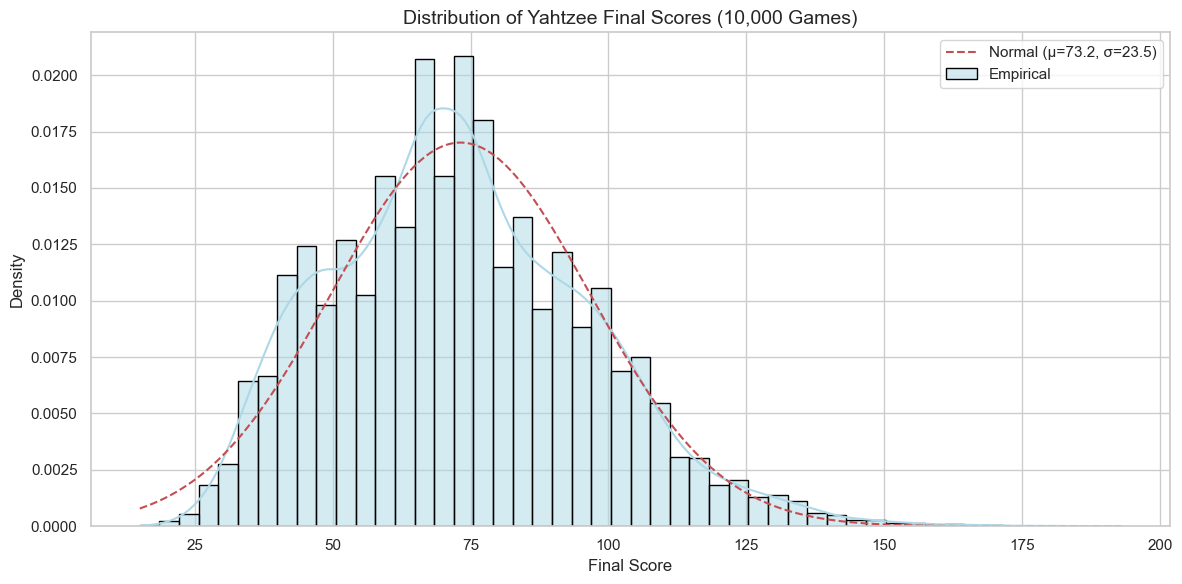

In [7]:
# Sort scores and assign a virtual index (like time or rank)
sorted_scores = np.sort(scores)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# Plot histogram with KDE (empirical distribution)
sns.histplot(sorted_scores, bins=50, kde=True, stat="density", color="lightblue", edgecolor="black", label="Empirical")

# Overlay normal distribution curve

x = np.linspace(min(sorted_scores), max(sorted_scores), 1000)
y = norm.pdf(x, mean_score, std_score)
plt.plot(x, y, 'r--', label=f"Normal (μ={mean_score:.1f}, σ={std_score:.1f})")

# Plot styling
plt.title("Distribution of Yahtzee Final Scores (10,000 Games)", fontsize=14)
plt.xlabel("Final Score")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()